In [22]:
%matplotlib inline
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#專門做『技術分析』的套件
import talib
from talib import abstract

In [23]:
#q1
#匯入0050.csv檔,並轉換為dataframe
df = pd.read_csv("0050.csv")
df = pd.DataFrame(df)
df.index = df["Date"]
#計算sma，計算使用者輸入之相對應的5sma,20sma,60sma的數值
def sma_calculation(x_sma,period):
    SMA = talib.SMA(df[x_sma], timeperiod = period)
    return SMA
#使用者輸入
fsma = input("請輸入要統計的欄位：（5-SMA)")
tsma = input("請輸入要統計的欄位：（20-SMA)")
ssma = input("請輸入要統計的欄位：（60-SMA)")
#呼叫上方程式，並將上方方程式算好的sma分別assign到five_sma,twenty_sma,sixty_sma
five_sma=sma_calculation(fsma,5)
twenty_sma=sma_calculation(tsma,20)
sixty_sma=sma_calculation(ssma,60)

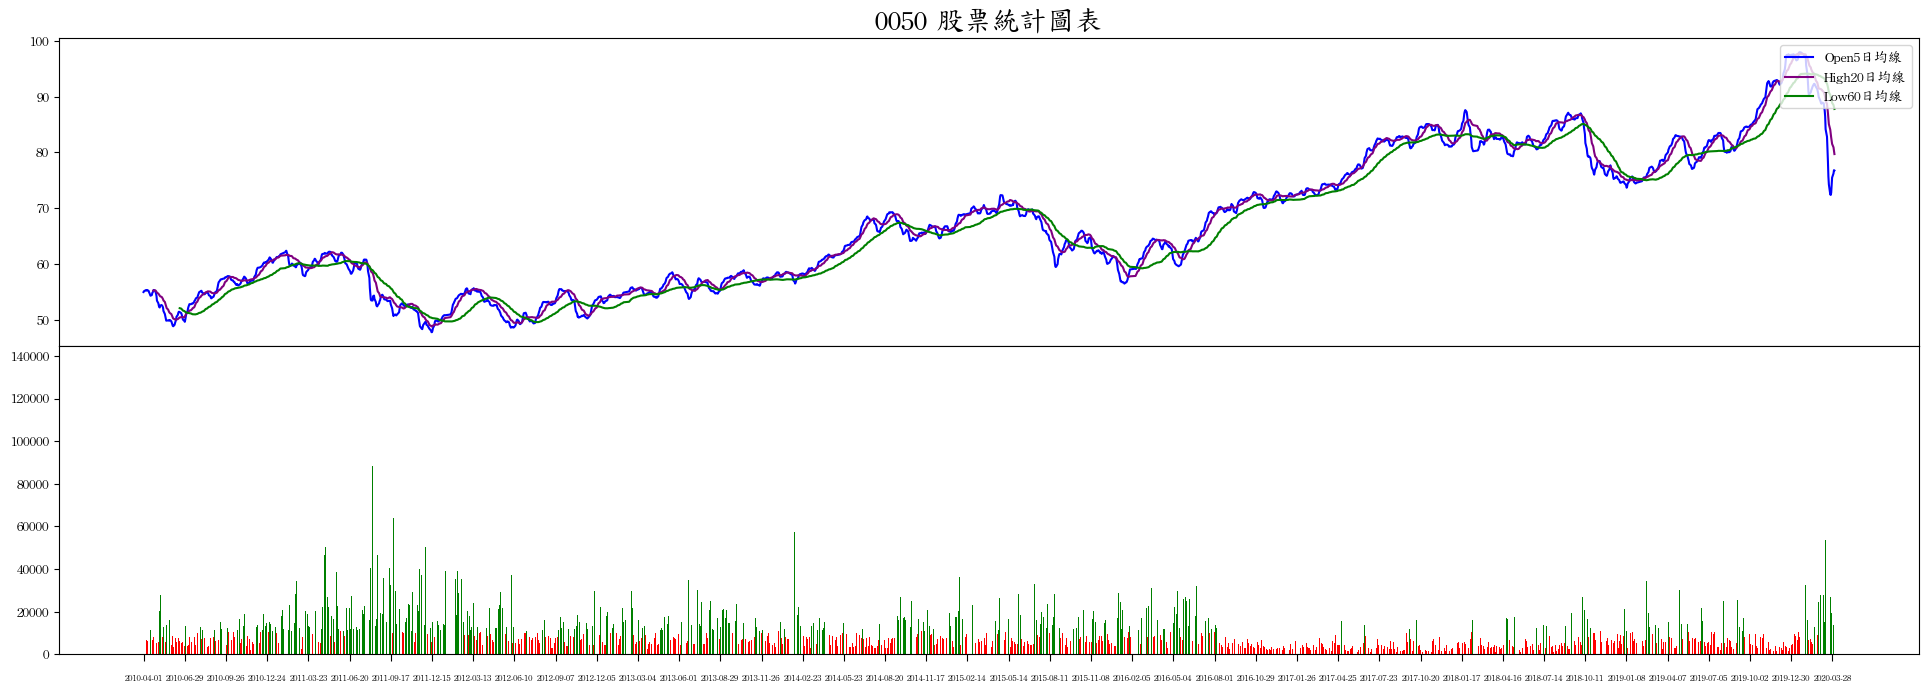

In [81]:
#設定好圖表的字體以免中文顯示有問題
plt.rcParams['font.sans-serif'] = ['BiauKai']
#設置圖表大小及顏色
fig=plt.figure(figsize=(24,8), dpi=100, facecolor="white",edgecolor="green")
#標題
plt.title("0050 股票統計圖表",{"size":20,"color":"black"})
#關掉plt的刻度
plt.axis("off")
#新增兩個子圖
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
#兩個子圖間不要有間隔
plt.subplots_adjust(hspace=0)
#處理日期
date = pd.to_datetime(df["Date"], format='%Y-%m-%d')
#主刻度為天，間隔90天
ax2.set_xticks(pd.date_range(date[0],date[-1],freq='90D'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
ax2.tick_params(which='major',axis='x',labelrotation=0,labelsize=6.5,length=5,pad=10)
#將上方子圖的折線分別畫出
ax.plot(date,five_sma, color="blue", label=fsma+'5日均線',markerfacecolor='red',markersize=6)
ax.plot(date,twenty_sma, color='purple', label=tsma+'20日均線',markerfacecolor='#121466',markersize=6)
ax.plot(date,sixty_sma, color='green', label=ssma+'60日均線',markerfacecolor='#121466',markersize=6)
#將下方的子圖用長條圖畫出，超過平均為綠色，低於平均為紅色（amount)
ax2.bar(df.Date, df.Amount,color=['green'if val-df.Amount.mean()>0 else 'red' for val in df.Amount])
#lengend標籤位置，1為右上角
ax.legend(loc=1)
plt.show()

In [14]:
#q2
from scipy.stats import zscore
#匯入檔案
df2 = pd.read_csv("0056.csv")
df2 = pd.DataFrame(df2)
df2.index=df2["Date"]
del df2["Date"]
#將df2每個值都轉換為z-score
df3 = df2.apply(zscore)
#算出每行的平均跟標準差
avg_list=list(np.mean(df3, axis=0))
std_list=list(np.std(df3, axis=0))
#新增兩列分別放平均跟標準差
df3.loc["平均值"]=avg_list
df3.loc["標準差"]=std_list
print(df3)


                   Open          High           Low         Close    Amount
Date                                                                       
2010/4/1  -9.673117e-01 -9.277534e-01 -9.253604e-01 -8.727837e-01 -0.351120
2010/4/2  -9.090263e-01 -9.277534e-01 -8.568140e-01 -8.780742e-01 -0.350347
2010/4/6  -8.613382e-01 -7.954375e-01 -8.146316e-01 -7.934256e-01 -0.324167
2010/4/7  -7.977542e-01 -7.054626e-01 -7.302668e-01 -6.876149e-01 -0.331568
2010/4/8  -6.917808e-01 -7.001700e-01 -7.144484e-01 -7.352298e-01 -0.344824
...                 ...           ...           ...           ...       ...
2020/3/30 -3.473671e-01 -2.132472e-01 -3.717164e-01 -1.585615e-01  2.191610
2020/3/31 -1.884951e-02 -3.859010e-02 -6.589396e-02 -6.862242e-02  1.875453
2020/4/1  -7.183622e-02 -7.563857e-02 -5.007556e-02 -3.687921e-02  0.649269
平均值       -4.381440e-16  5.534451e-16 -3.113128e-16  4.842644e-16  0.000000
標準差        1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000

[2467 rows 